In [42]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import kurtosis, skewnorm

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

# Import dataset
data_set = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M3/M3. bond_and_stock_data.csv")

## **1. Skewness**

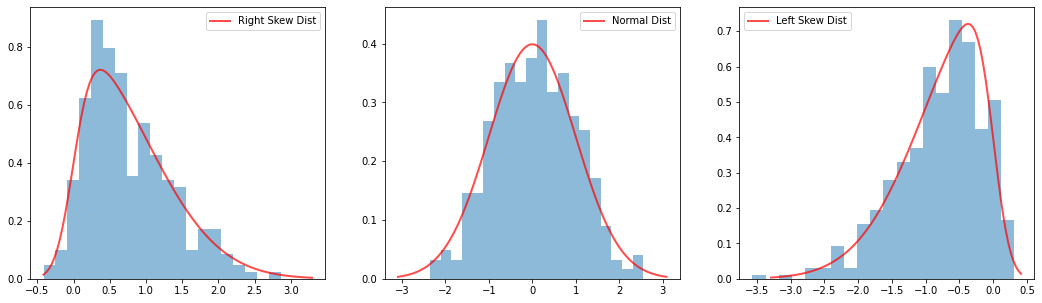

In [43]:
# Histograms of Normal Distribution, Right-Skew and Left-Skew Distributions


# Helper HistogramPlot function
def HistogPlot(a, label):
    # np.random.seed(12345)
    r = skewnorm.rvs(a, size=500)
    x = np.linspace(skewnorm.ppf(0.001, a), skewnorm.ppf(0.999, a), 100)
    plt.plot(x, skewnorm.pdf(x, a), "r-", lw=2, alpha=0.7, label=label)  # Density
    plt.hist(r, bins=20, density=True, histtype="stepfilled", alpha=0.5)  # Histogram
    plt.legend()


# Plot
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(131)
HistogPlot(5, "Right Skew Dist")  # Right Skew a>0
ax2 = plt.subplot(132)
HistogPlot(0, "Normal Dist")  # Normal Dist. a=0
ax3 = plt.subplot(133)
HistogPlot(-5, "Left Skew Dist")  # Left Skew a<0
plt.show()

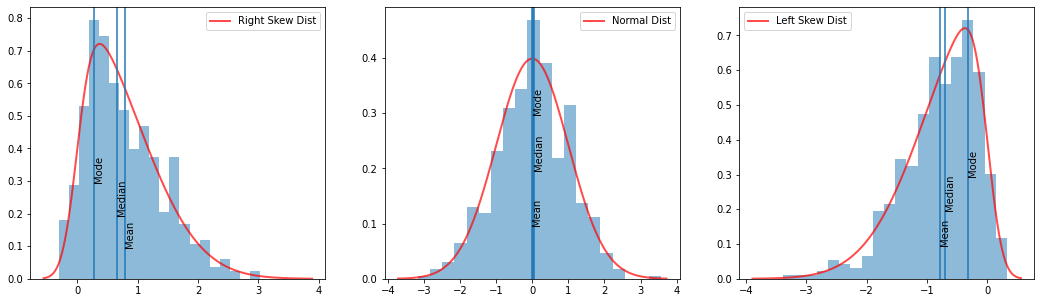

In [44]:
# Mean, Median, and Mode Relationships for Symmetric, Right-Skew and Left-Skew Distributions


# Helper HistogramPlot function
def HistogPlot(a, label):
    np.random.seed(123)
    r = skewnorm.rvs(a, size=500)
    x = np.linspace(skewnorm.ppf(0.0001, a), skewnorm.ppf(0.9999, a), 500)
    plt.plot(x, skewnorm.pdf(x, a), "r-", lw=2, alpha=0.7, label=label)  # Density
    n, bins, patches = plt.hist(
        r, bins=20, density=True, histtype="stepfilled", alpha=0.5
    )  # Histogram

    # Add Mean
    plt.axvline(x=np.mean(r))
    plt.text(np.mean(r), 0.1, "Mean", rotation=90)

    # Add Median
    plt.axvline(x=np.median(r))
    plt.text(np.median(r), 0.2, "Median", rotation=90)

    # Add Mode (by the most frequent bin)
    plt.axvline(x=(bins[n.argmax()] + bins[n.argmax() + 1]) / 2)
    plt.text((bins[n.argmax()] + bins[n.argmax() + 1]) / 2, 0.3, "Mode", rotation=90)
    plt.legend()


# Plot
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(131)
HistogPlot(5, "Right Skew Dist")
ax2 = plt.subplot(132)
HistogPlot(0, "Normal Dist")
ax3 = plt.subplot(133)
HistogPlot(-5, "Left Skew Dist")
plt.show()

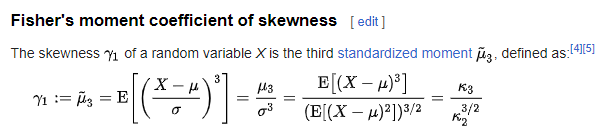

The properties of this test coefficient are:

> 1. A symmetric distribution will have value = $0$. A negative value indicates a left-skew distribution. A positive value indicates a right-skew distribution.
> 2. The coefficient compares the data with a normal distribution. The larger the value of the coefficient, the more the data deviates from normal distribution.
> 3. The metric can be adjusted for sample size by multiplying $\frac{\sqrt{n(n-1)}}{n-2}$. When the sample size is large, this adjustment factor approaches $1$.

## **2. Kurtosis**

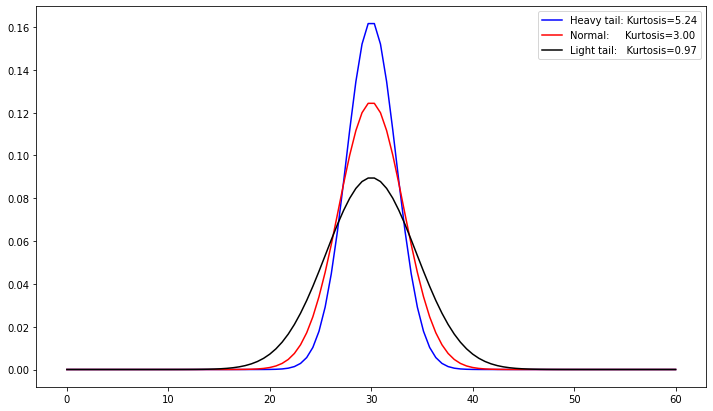

In [45]:
# Three distributions with different tail shapes
x = np.linspace(0, 60, 100)
y1 = stats.norm.pdf(x, loc=30, scale=2.450)
y2 = stats.norm.pdf(x, loc=30, scale=3.194)
y3 = stats.norm.pdf(x, loc=30, scale=4.450)

# Plot each distribution
plt.figure(figsize=(12, 7))
plt.plot(x, y1, c="b", label="Heavy tail: Kurtosis={:.2f}".format(kurtosis(y1)))
plt.plot(x, y2, c="r", label="Normal:     Kurtosis={:.2f}".format(kurtosis(y2)))
plt.plot(x, y3, c="k", label="Light tail:   Kurtosis={:.2f}".format(kurtosis(y3)))
plt.legend()
plt.show()

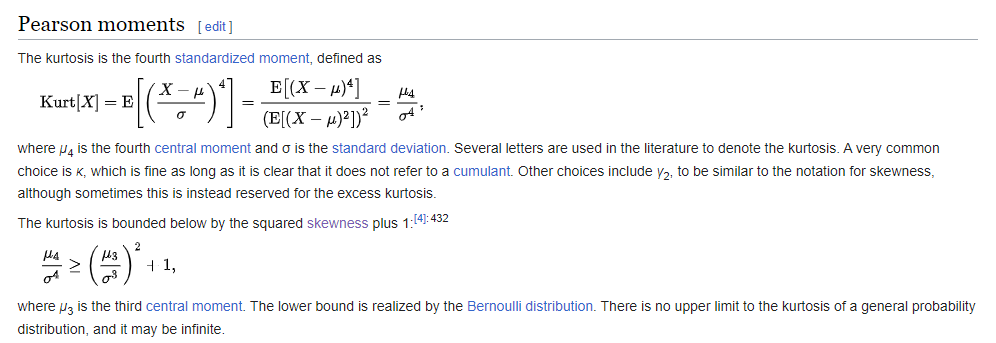

_________________________

### **3.1 The Basics of Skew-Normal Distribution**

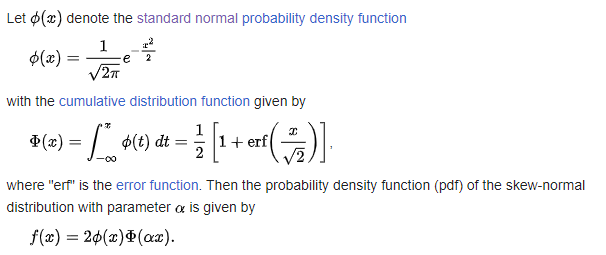

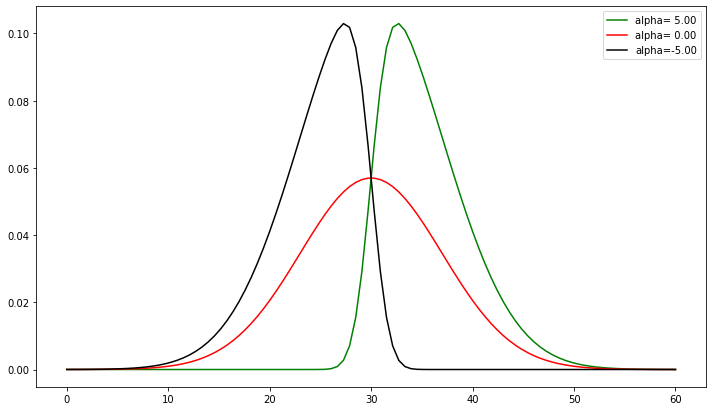

In [46]:
# Simulated Skew-Normal Distributions with Different Shape Parameters
plt.figure(figsize=(12, 7))
x = np.linspace(0, 60, 100)

alpha = 5
plt.plot(
    x,
    stats.skewnorm.pdf(x, alpha, loc=30, scale=7),
    c="g",
    label="alpha= {:.2f}".format(alpha),
)

alpha = 0
plt.plot(
    x,
    stats.skewnorm.pdf(x, alpha, loc=30, scale=7),
    c="r",
    label="alpha= {:.2f}".format(alpha),
)

alpha = -5
plt.plot(
    x,
    stats.skewnorm.pdf(x, alpha, loc=30, scale=7),
    c="k",
    label="alpha={:.2f}".format(alpha),
)
plt.legend()
plt.show()

$\phi(x)$ is the standard normal PDF and $\Phi(\alpha x)$ is the standard normal CDF. $\alpha$ is a **shape parameter**. Figure 4 shows skew-normal distributions with different $\alpha$'s. Here are some properties about $\alpha$:

> - When $\alpha = 0$, skew-normal distribution is standard normal distribution (red curve in figure 4).
> - When $\alpha > 0$, skew-normal distribution is a right-skew distribution (green curve in figure 4).
> - When $\alpha < 0$, skew-normal distribution is a left-skew distribution (black curve in figure 4).
> - When $|\alpha|$ increases, the peak of the distribution will move farther to either the right side or left side.

Skew-normal distribution and its related distribution families are heavy on math calculations. One tricky part is that skew-normal has two ways to express its parameters: **direct parameters** (DP) and **centered parameters** (CP). They exist due to maximum likelihood optimization calculations. We will not go into detail about these technicalities here. Let's talk about what they are and what we need to pay attention to when using them with skew-normal distribution.

Let's assume random variable $X$ has a skew-normal distribution with mean = $\mu$, standard deviation = $\sigma$, skewness = $\gamma _{1}$, we can denote $X$ as follows:

**Centered Parameters Method (CP)**: 

$$ X \sim SN(\mu,\sigma,\gamma_{1}) $$ 

Where  $-0.995 < \gamma_{1} < 0.995$

**Direct Parameters Method (DP)**: 

$$ X \sim SN(\xi, \omega, \alpha ) $$

Where $\xi$ is location parameter, $\omega$ is scale parameter and $\alpha$ is shape parameter

There are functions to convert centered parameters to direct parameters and vice versa in most statistical applications. Therefore, you do not need to convert them by hand. We are more familiar with elements in the centered parameters method and their interpretation. You can always start from CP and then use the selected application to convert them to DP. Before you use any skew-normal distribution functions with your selected statistical application, make sure you understand what form of inputs (CP or DP) the function takes. 

____________________

Now, let's try to fit our data to normal or skew-normal distributions

In [47]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import kurtosis, skewnorm

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

# Import dataset
data_set = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M3/M3. bond_and_stock_data.csv")
data_set.head(10)

,Date,13W_TB,5Y_TBY,10Y_TBY,30Y_TBY,DWJ,Year
0,1/5/2016,0.322581,-0.006340,0.001336,0.007023,0.000567,2016
1,1/6/2016,0.000000,-0.042923,-0.031584,-0.023580,-0.014695,2016
2,1/7/2016,-0.073171,-0.023030,-0.011024,-0.004762,-0.023211,2016
3,1/8/2016,0.000000,-0.021092,-0.010683,-0.002051,-0.010152,2016
4,1/11/2016,-0.078947,-0.001267,0.013146,0.012329,0.003188,2016
5,1/12/2016,0.200000,-0.024746,-0.025950,-0.025034,0.007174,2016
6,1/13/2016,0.023810,-0.018217,-0.017127,-0.011797,-0.022088,2016
7,1/14/2016,0.116279,0.006627,0.015489,0.015449,0.014094,2016
8,1/15/2016,-0.070833,-0.043450,-0.030982,-0.027317,-0.023870,2016
9,1/19/2016,0.031390,0.012388,0.000984,-0.003199,0.001748,2016


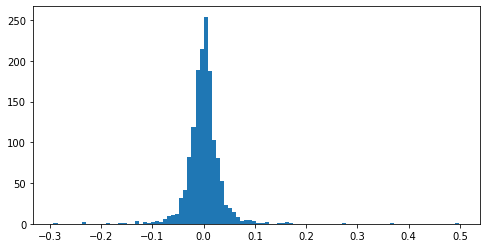

In [48]:
# Look at the distribution of 10Y_TBY, daily 10Y treasury returns
plt.figure(figsize=(8, 4))
plt.hist(data_set["10Y_TBY"], bins=100);

This distribution looks like a Gaussian, let's use a QQ plot to be sure.

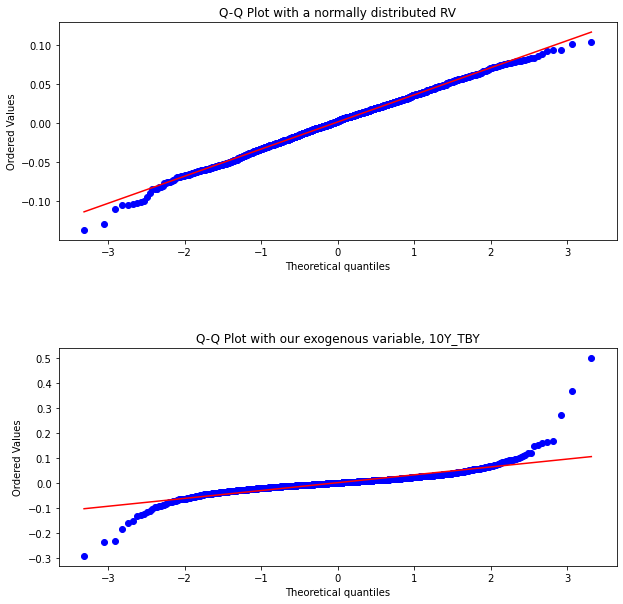

In [49]:
# Create a new theoretical array, drawn from iid X_i ~ N
# where mean and var of X_i are the same as sample mean and var of 10Y_TBY
x = np.random.normal(data_set["10Y_TBY"].mean(), data_set["10Y_TBY"].std(), size=len(data_set["10Y_TBY"]))

fig, axs = plt.subplots(2, 1, figsize=(10, 10))
stats.probplot(x, dist="norm", plot=axs[0])
axs[0].set(title="Q-Q Plot with a normally distributed RV")
stats.probplot(data_set["10Y_TBY"], dist="norm", plot=axs[1])
axs[1].set(title="Q-Q Plot with our exogenous variable, 10Y_TBY")

fig.subplots_adjust(hspace=0.5)

As you can see, our exogenous variable is **NOT** normally distributed. Now let's try a skew-normal Q-Q plot:

((array([-0.05918433, -0.05325351, -0.04994033, ...,  0.11338001,
          0.1182525 ,  0.12706374]),
  array([-0.29320113, -0.23758099, -0.23449001, ...,  0.26980943,
          0.3695055 ,  0.498998  ])),
 (1.1434226490837371, -0.026630917443527077, 0.874377184080119))

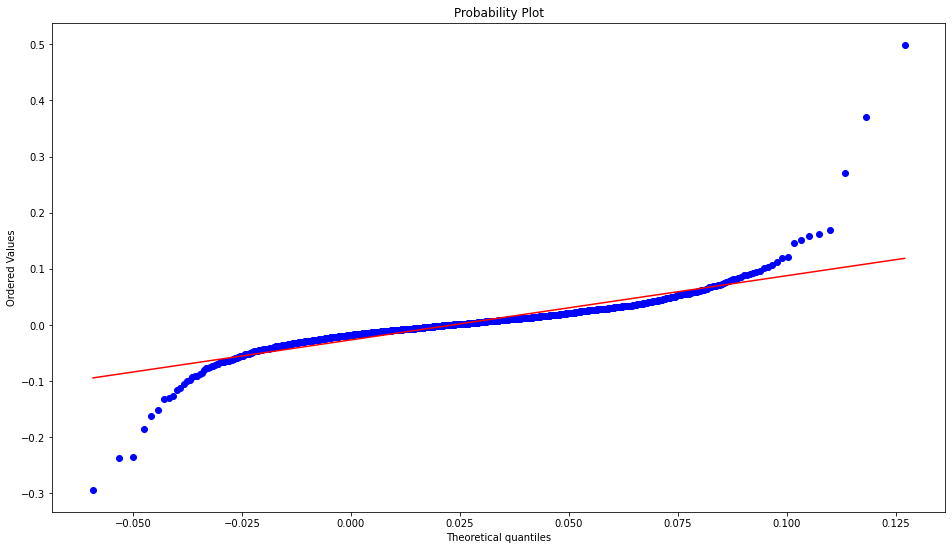

In [52]:
fig, ax = plt.subplots()
alpha = 1.36
mean = data_set["10Y_TBY"].mean()
std = data_set["10Y_TBY"].std()
stats.probplot(data_set["10Y_TBY"], dist=stats.skewnorm, sparams=(alpha, mean, std), plot=ax)

Skew only did not work, apparently.

### **3.3 The Basics of Skew-t Distribution**

A skew-t distribution is like a Student's t-distribution with the flexibility to adjust for the heaviness of the tails. Student's t-distribution is a symmetric distribution that has heavier tails than normal distribution. Usually Student's t-distribution is used when the data distribution is symmetric but the tails are thicker or longer than Normal distribution. In this section, we are going to introduce a distribution that is like Student's t-distribution but can both handle skewness and kurtosis. This is skew-t distribution.



**Figure 11: Simulated Skew-t Distributions with Different Degrees of Freedom**

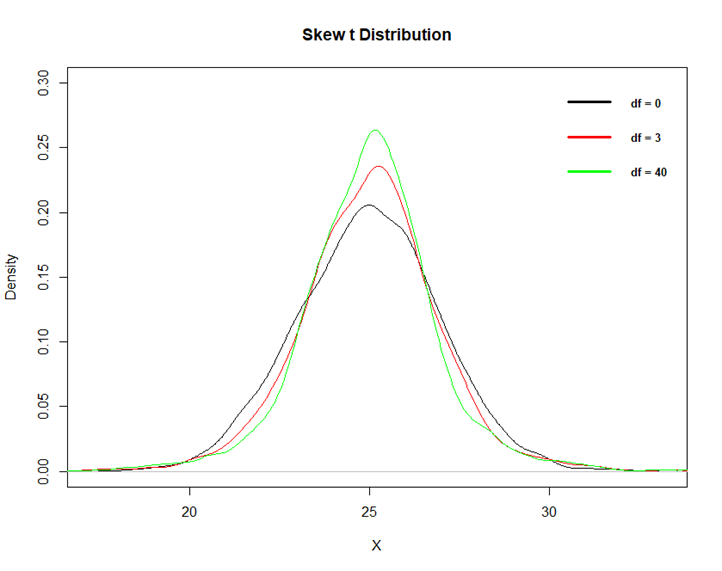

If X is a continuous random variable, it's skew-t density function is as follows:

$2t(X;\nu )T(\alpha X;\nu )$

Where $\nu$ is degree of freedom 

And $ t(X;\nu )$ is the probability density function for Student's-t distribution

And $ T(\alpha X;\nu )$ is the cumulative probability distribution function for Student's t-distribution.

Figure 11 shows three skew-t distributions with different degrees of freedom. The degree of freedom is a parameter for skew-t distribution to adjust the thickness of the tails. As the degree of freedom decreases, the peak of the distribution gets thinner and the tails get heavier. Here are some properties of skew-t distribution:

* When $\alpha$ =0, skew-t distribution reduces to Student's t-distribution.

* When $ \nu\to \infty $, skew-t distribution reduces to skew normal distribution

* When $\alpha$ =0 and $ \nu\to \infty $, skew-t distribution reduces to standard normal distribution.

Similar to skew-normal distribution, skew-t distribution also has a CP-DP conversion adjustment. Let's look at skew-t distribution's CP and DP. Assume random variable X has a skew-t distribution with mean = $\mu$, standard deviation = $\sigma$, skewness = $\gamma _{1}$ and kurtosis = $\gamma_{2}$, and we can denote X as follows:

Centered Parameters Method (CP): $ X\sim ST(\mu ,\sigma ,\gamma _{1},\gamma_{2})$ 

Where $\gamma _{1}$ < 0.995

Direct Parameters Method (DP): $X\sim ST(\xi ,\omega ,\alpha,\nu )$

Where $\xi$ is location parameter, $\omega$ is scale parameter, $\alpha$ is shape parameter and $\nu$ is degree of freedom

Any statistical application can convert CP to DP and vice versa for skew-t distribution.


((array([-1.19131076, -0.76376196, -0.60419308, ...,  0.60494341,
          0.76451229,  1.19206109]),
  array([-0.29320113, -0.23758099, -0.23449001, ...,  0.26980943,
          0.3695055 ,  0.498998  ])),
 (0.3849688794594273, 0.0002307386792562342, 0.9869432247935424))

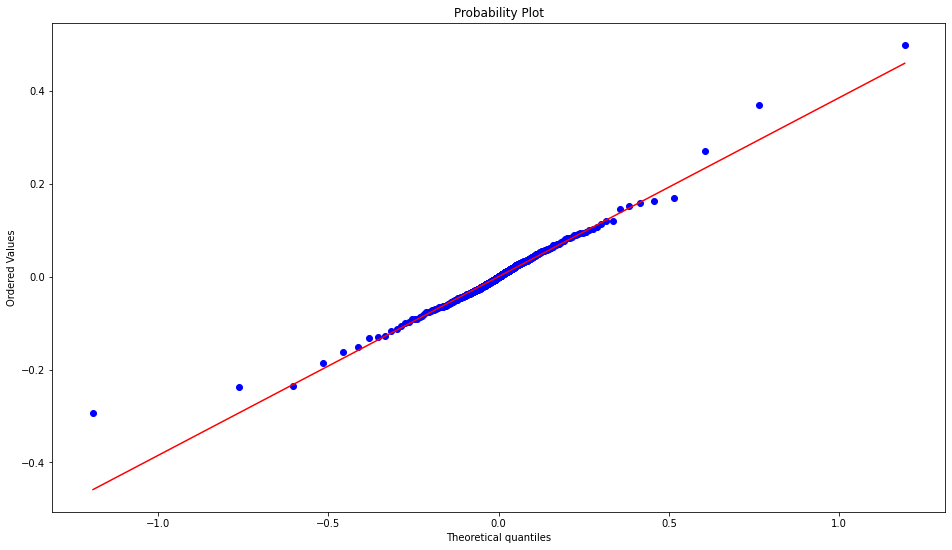

In [60]:
fig, ax = plt.subplots()

alpha = 1.36
mean = data_set["10Y_TBY"].mean()
std = data_set["10Y_TBY"].std()

stats.probplot(data_set["10Y_TBY"], dist=stats.t, sparams=(2, mean, std), plot=ax)

With degrees of freedom = 2,

t-distribution is a much better fit for our bond returns.

This means it has heavy tails !